<a href="https://colab.research.google.com/github/Sharukevo/solarflares/blob/main/Solar_Flares_%5B2002_2016%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
#display plots and figures 
%matplotlib inline          
from __future__ import division, print_function        

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#parameters 
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (12, 9)
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [45]:
#importing data
df = pd.read_csv('https://raw.githubusercontent.com/Sharukevo/solarflares/main/hessi.solar.flare.2002to201.csv',sep=",")
df.head(3)

,flare,start.date,start.time,peak,end,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5
0,2021213,2002-02-12,21:29:56,21:33:38,21:41:48,712,136,167304,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN
1,2021228,2002-02-12,21:44:08,21:45:06,21:48:56,288,7,9504,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN
2,2021332,2002-02-13,00:53:24,00:54:54,00:57:00,216,15,11448,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN


In [46]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113942 entries, 0 to 113941
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   flare             113942 non-null  int64 
 1   start.date        113942 non-null  object
 2   start.time        113942 non-null  object
 3   peak              113942 non-null  object
 4   end               113942 non-null  object
 5   duration.s        113942 non-null  int64 
 6   peak.c/s          113942 non-null  int64 
 7   total.counts      113942 non-null  int64 
 8   energy.kev        113942 non-null  object
 9   x.pos.asec        113942 non-null  int64 
 10  y.pos.asec        113942 non-null  int64 
 11  radial            113942 non-null  int64 
 12  active.region.ar  113942 non-null  int64 
 13  flag.1            113942 non-null  object
 14  flag.2            113942 non-null  object
 15  flag.3            94035 non-null   object
 16  flag.4            93740 non-null   obj

In [47]:
df.describe()

,flare,duration.s,peak.c/s,total.counts,x.pos.asec,y.pos.asec,radial,active.region.ar
count,1.139420e+05,113942.000000,113942.000000,1.139420e+05,113942.000000,113942.000000,113942.000000,113942.000000
mean,1.086459e+07,493.051728,212.321532,3.772013e+05,-9.752181,-43.129812,689.528892,979.922926
std,9.832864e+06,433.389295,833.776871,3.071203e+06,757.017401,404.547666,513.203089,1350.484625
min,2.021213e+06,8.000000,0.000000,8.000000e+00,-10012.000000,-10005.000000,0.000000,0.000000
25%,4.110734e+06,212.000000,28.000000,2.292000e+04,-704.000000,-249.000000,469.000000,0.000000
50%,1.112022e+07,364.000000,53.000000,5.857400e+04,0.000000,-75.000000,759.000000,687.000000
75%,1.403013e+07,628.000000,144.000000,1.794420e+05,706.000000,198.000000,946.000000,1543.000000
max,1.412161e+08,4444.000000,113156.000000,4.355501e+08,1002.000000,1012.000000,14154.000000,9999.000000


In [48]:
#Checking null values
df.isnull().any()

flare               False
start.date          False
start.time          False
peak                False
end                 False
duration.s          False
peak.c/s            False
total.counts        False
energy.kev          False
x.pos.asec          False
y.pos.asec          False
radial              False
active.region.ar    False
flag.1              False
flag.2              False
flag.3               True
flag.4               True
flag.5               True
dtype: bool

In [49]:
#Counting null values
df.isnull().sum()

flare                   0
start.date              0
start.time              0
peak                    0
end                     0
duration.s              0
peak.c/s                0
total.counts            0
energy.kev              0
x.pos.asec              0
y.pos.asec              0
radial                  0
active.region.ar        0
flag.1                  0
flag.2                  0
flag.3              19907
flag.4              20202
flag.5              60951
dtype: int64

In [50]:
#importing data
new_df = pd.read_csv('https://raw.githubusercontent.com/Sharukevo/solarflares/main/hessi.solar.flare.2002to201.csv',sep=",", index_col=0)

# date & time
def parse_date(sdatex,stimex):
    datex = datetime.strptime(sdatex, '%Y-%m-%d')
    timex = datetime.strptime(stimex, '%H:%M:%S')
    return datetime(datex.year,datex.month,datex.day,timex.hour,timex.minute,timex.second)


new_df['dt.start'] = new_df[['start.date','start.time']].apply(lambda x: parse_date(x[0],x[1]), axis=1)
new_df['dt.peak'] = new_df[['start.date','peak']].apply(lambda x: parse_date(x[0],x[1]), axis=1)
new_df['dt.end'] = new_df[['start.date','end']].apply(lambda x: parse_date(x[0],x[1]), axis=1)

new_df.drop(['start.date','start.time','peak','end'], axis=1, inplace=True)

new_df['year'] = new_df['dt.start'].apply(lambda col: col.year)
new_df['month'] = new_df['dt.start'].apply(lambda col: col.month)
new_df['day'] = new_df['dt.start'].apply(lambda col: col.day)

In [51]:
#current columns of dataframe
new_df.columns

Index(['duration.s', 'peak.c/s', 'total.counts', 'energy.kev', 'x.pos.asec',
       'y.pos.asec', 'radial', 'active.region.ar', 'flag.1', 'flag.2',
       'flag.3', 'flag.4', 'flag.5', 'dt.start', 'dt.peak', 'dt.end', 'year',
       'month', 'day'],
      dtype='object')

In [52]:
#Adjusting column names 
new_df = new_df.rename(columns = {'duration.s':'duration_s', 'peak.c/s':'peak_c_s', 'total.counts':'total_counts', 'energy.kev':'energy_kev', 'x.pos.asec':'x_pos_asec',
       'y.pos.asec':'y_pos_asec', 'active.region.ar':'active_region_ar', 'flag.1':'flag_1', 'flag.2':'flag_2',
       'flag.3':'flag_3', 'flag.4':'flag_4', 'flag.5':'_flag_5', 'dt.start':'date_start', 'dt.peak':'date_peak', 'dt.end':'date_end'})

In [53]:
#Display new processed data
new_df.head(3)

,duration_s,peak_c_s,total_counts,energy_kev,x_pos_asec,y_pos_asec,radial,active_region_ar,flag_1,flag_2,flag_3,flag_4,_flag_5,date_start,date_peak,date_end,year,month,day
flare,,,,,,,,,,,,,,,,,,,
2021213,712,136,167304,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN,2002-02-12 21:29:56,2002-02-12 21:33:38,2002-02-12 21:41:48,2002,2,12
2021228,288,7,9504,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN,2002-02-12 21:44:08,2002-02-12 21:45:06,2002-02-12 21:48:56,2002,2,12
2021332,216,15,11448,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN,2002-02-13 00:53:24,2002-02-13 00:54:54,2002-02-13 00:57:00,2002,2,13


In [54]:
DATA_by_yr = new_df.groupby(['year'])['total_counts'].sum()
DATA_by_month = new_df.groupby(['month'])['total_counts'].sum().sort_values(ascending=False)
DATA_vs_energy = new_df.groupby(['energy_kev'])['energy_kev'].count().sort_values(ascending=True)

In [55]:
data_part = new_df.iloc[1:1000, 0:4]
data_part.columns

Index(['duration_s', 'peak_c_s', 'total_counts', 'energy_kev'], dtype='object')

Text(0.5, 1.0, 'Energy density vs Time Duration')

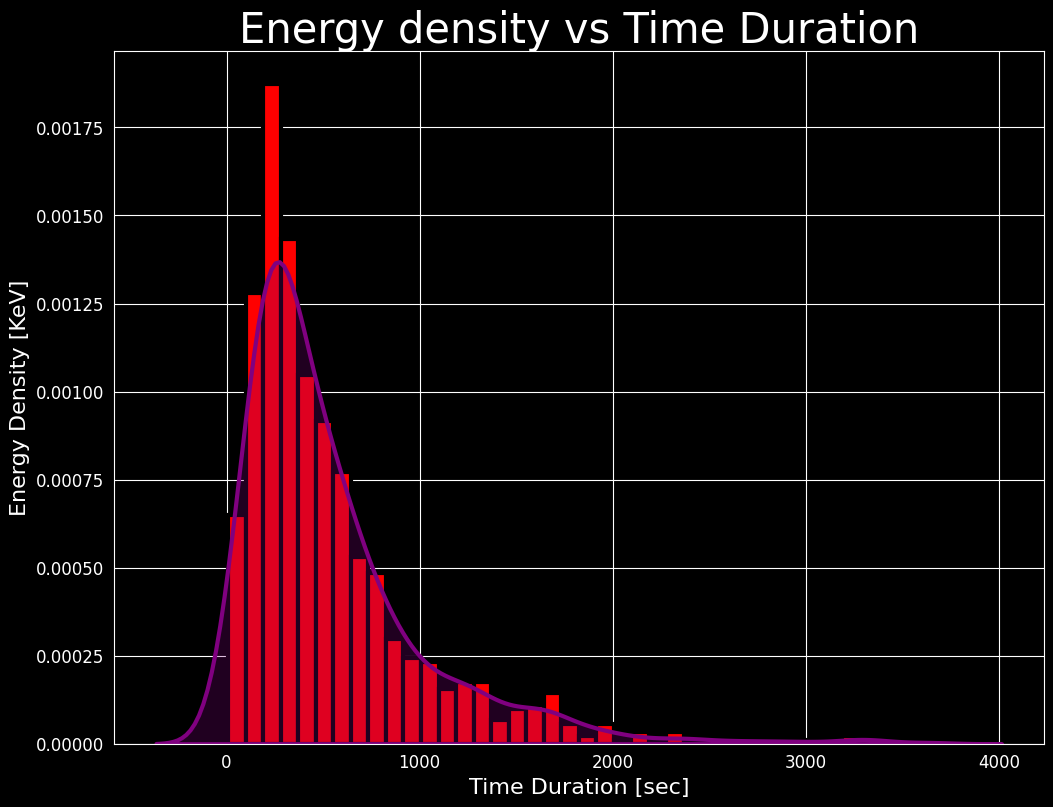

In [56]:
#Plotting Energy density vs Time Duration
plt.style.use('dark_background')
sns.distplot(data_part['duration_s'], kde_kws=dict(color='purple', lw=3, shade=True),
             hist_kws=dict(alpha=1, color= 'red', edgecolor='black', lw=3))
plt.xlabel('Time Duration [sec]', fontsize=16)
plt.ylabel('Energy Density [KeV]', fontsize=16)

plt.title('Energy density vs Time Duration', fontsize=30)

Text(0.5, 1.0, 'Number of Solar Flares vs. Year')

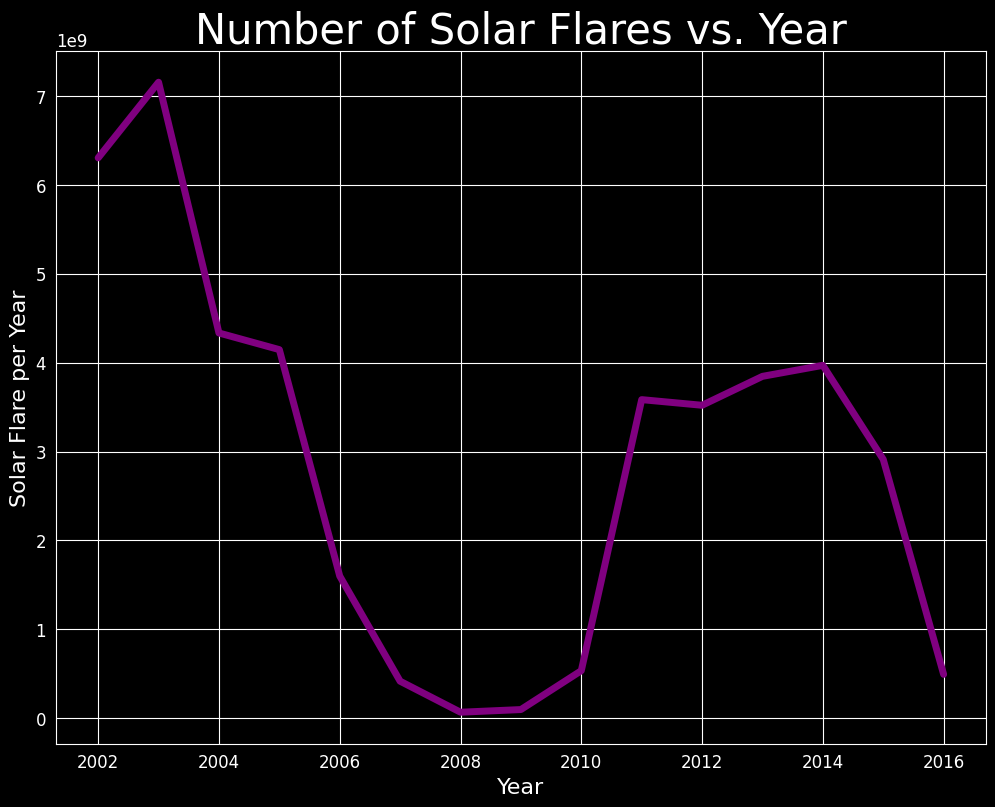

In [57]:
#Plotting Number of Solar Flares vs Year
plt.style.use('dark_background')
plt.plot(DATA_by_yr, 'purple', linewidth=5)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Solar Flare per Year', fontsize=16)

plt.title('Number of Solar Flares vs. Year', fontsize=30)